In [2]:
# Computes a simple variational Bayesian inference model - January 2018

import numpy as np
import matplotlib.pyplot as plt
import math

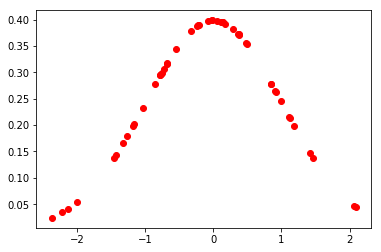

In [20]:
# Creates the intial dataset

# Number of data points and original parameters of the Gaussian
N = 50
real_mu = 0
real_sigma = 1

# Adds a gaussian error epsilon 
epsilon = 0

X = np.random.normal(real_mu, real_sigma, N) 
#X = X + np.random.normal(X, epsilon, N)
Y = 1./(real_sigma*np.sqrt(2*np.pi))*np.exp(-pow(X - real_mu,2)/(2*pow(real_sigma,2)))

plt.plot(X,Y,'ro')
plt.show()

In [21]:
# Initial hyperparameters

a_0 = 1.
b_0 = 1.
lambda_0 = 1.
mu_0 = 2.

In [22]:
# Computes re-estimation of parameters until convergence

lambd = lambda_0
b = b_0

sum_of_x = sum(X)
sum_of_x_squared = sum(X*X)

mu = (lambda_0*mu_0 + sum_of_x)/(lambda_0 + N)
a = a_0 + N/2

for i in range(100):
    
    lambd = (lambda_0 + N)*(a/b)
    
    b = b_0 + 0.5*(sum_of_x_squared + lambda_0*pow(mu_0,2) - 2*mu*(sum_of_x + lambda_0*mu_0) + (N + lambda_0)*(1/lambd + pow(mu,2)))
    


1326.0
31.4042437322
42.2235928146
31.988940727
41.4518258455
32.0001849
41.4372605703
32.0004011341
41.4369805692
32.0004052925
41.4369751846
32.0004053724
41.436975081
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.436975079
32.000405374
41.43697507

In [10]:
# Plots the posterior distribution of the latent variables

mesh_size = 300

X_mu = np.linspace(-1,1,mesh_size)
X_tau = np.linspace(0,2,mesh_size)

gamma = math.gamma(a)

Y_mu = np.sqrt(lambd)/np.sqrt(2*np.pi)*np.exp((-pow(X_mu - real_mu, 2)*lambd)/2)    
Y_tau = (pow(b,a)*pow(X_tau,a-1)*np.exp(-b*X_tau))/gamma

Z = np.zeros((mesh_size, mesh_size))

for i in range(mesh_size):
    
    for j in range(mesh_size):
    
        Z[i,j] = Y_tau[i]*Y_mu[j]


In [7]:
# Plots the exact posterior distribution

"""
likelihood = np.zeros((mesh_size, mesh_size))
Z_exact = np.zeros((mesh_size, mesh_size))
Z_test = np.zeros((mesh_size, mesh_size))

gamma_0 = math.gamma(a_0)

# Loop on tau
for j in range(mesh_size):
    
    Y_exact_tau = (pow(b_0, a_0)*pow(X_tau[j], a_0 - 1)*np.exp(-b_0*X_tau[j]))/gamma_0    

    # Loop on mu
    for k in range(mesh_size):

        like = pow(X_tau[j]/(2*np.pi), N/2)
    
        # Loop on data points
        for i in range(N):
    
            like *= np.exp(-(X_tau[j]*pow(X[i]-X_mu[k], 2))/2)
        
        Y_exact_mu = np.sqrt(lambda_0*X_tau[j])/np.sqrt(2*np.pi)*np.exp((-pow(X_mu[k] - mu_0, 2)*lambda_0*X_tau[j])/2)
        Z_exact[j][k] = like*Y_exact_tau*Y_exact_mu
        
        Z_test[j][k] = Y_exact_mu*Y_exact_tau
        
        likelihood[j][k] = like
"""

'\nlikelihood = np.zeros((mesh_size, mesh_size))\nZ_exact = np.zeros((mesh_size, mesh_size))\nZ_test = np.zeros((mesh_size, mesh_size))\n\ngamma_0 = math.gamma(a_0)\n\n# Loop on tau\nfor j in range(mesh_size):\n    \n    Y_exact_tau = (pow(b_0, a_0)*pow(X_tau[j], a_0 - 1)*np.exp(-b_0*X_tau[j]))/gamma_0    \n\n    # Loop on mu\n    for k in range(mesh_size):\n\n        like = pow(X_tau[j]/(2*np.pi), N/2)\n    \n        # Loop on data points\n        for i in range(N):\n    \n            like *= np.exp(-(X_tau[j]*pow(X[i]-X_mu[k], 2))/2)\n        \n        Y_exact_mu = np.sqrt(lambda_0*X_tau[j])/np.sqrt(2*np.pi)*np.exp((-pow(X_mu[k] - mu_0, 2)*lambda_0*X_tau[j])/2)\n        Z_exact[j][k] = like*Y_exact_tau*Y_exact_mu\n        \n        Z_test[j][k] = Y_exact_mu*Y_exact_tau\n        \n        likelihood[j][k] = like\n'

In [8]:
# Computes the exact posterior distribution from analytic formula

sum_of_x = sum(X)

s = (1./N)*sum((X - (1./N)*sum_of_x)*(X - (1./N)*sum_of_x))

final_mu = (lambda_0*mu_0 + sum_of_x)/(lambda_0 + N)
final_lambda = lambda_0 + N
final_a = a_0 + N/2
final_b = b_0 + 0.5*(N*s + (lambda_0*N*pow((1./N)*sum_of_x - mu_0, 2))/(lambda_0 + N))

final_Z = np.zeros((mesh_size, mesh_size))

gamma = math.gamma(final_a)

for i in range(mesh_size):
    
    for j in range(mesh_size):
        
        tau_point = X_tau[i]
        mu_point = X_mu[j]
        final_Z[i,j] = (pow(final_b, final_a)*np.sqrt(final_lambda))/(gamma*np.sqrt(2*np.pi))*pow(tau_point, final_a - 0.5)*np.exp(-final_b*tau_point)*np.exp(-0.5*final_lambda*tau_point*pow(mu_point - final_mu, 2))                                                


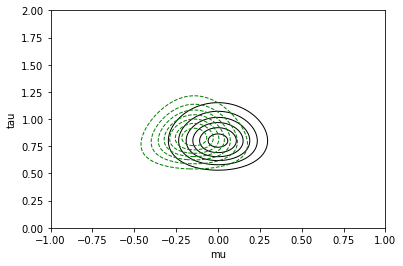

In [9]:
plt.contour(X_mu, X_tau, Z, colors = 'black', linewidths = 1)
#plt.contour(X_mu, X_tau, Z_exact, colors = 'red', linewidths = 1, linestyles='dashed')
#plt.contour(X_mu, X_tau, likelihood, colors = 'blue', linewidths = 1, linestyles='dashed')
#plt.contour(X_mu, X_tau, Z_test, colors = 'blue', linewidths = 1, linestyles='dashed')
plt.contour(X_mu, X_tau, final_Z, colors = 'green', linewidths = 1, linestyles='dashed')
plt.xlabel("mu")
plt.ylabel("tau")
plt.show()